In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from sklearn import datasets
from sklearn.datasets import load_boston
from statsmodels.regression.linear_model import OLS

In [2]:
house_data = load_boston()

# Get a numpy array of Feature Vectors
X = house_data.data

# Get a numpy array of Target Vectors
y = house_data.target

In [3]:
print(X.shape)

(506, 13)


In [4]:
feature_names = house_data.feature_names
print(feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(house_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# create vector of ones...
m = y.shape
const = np.ones(m)[..., None]
import statsmodels.api as sm
X = sm.add_constant(X, prepend=True)
#...and add to feature matrix
#X = np.concatenate((const, X), 1)
print(X)

[[1.0000e+00 6.3200e-03 1.8000e+01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [1.0000e+00 2.7290e-02 0.0000e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [1.0000e+00 6.0760e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0000e+00 1.0959e-01 0.0000e+00 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [1.0000e+00 4.7410e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
# calculate coefficients
coeff = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(coeff)

[ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]


In [8]:
# Get feature names from boston data set
names = house_data.feature_names
# Name our Intercept as 'INT' and prepend it in our dataframe
feature_names = np.insert(names, 0, 'INT')

# Make a Pandas dataframe of our coefficients
coeff_df = pd.DataFrame({'coeffs':coeff}, index=feature_names)

print(coeff_df.round(2))

         coeffs
INT       36.46
CRIM      -0.11
ZN         0.05
INDUS      0.02
CHAS       2.69
NOX      -17.77
RM         3.81
AGE        0.00
DIS       -1.48
RAD        0.31
TAX       -0.01
PTRATIO   -0.95
B          0.01
LSTAT     -0.52


In [9]:
# Extract Co-efficients by using Linear Models
coeffs_ols = OLS(y, X).fit().params
print(coeffs_ols)

[ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]


In [10]:
coeff_df['coeffs_ols'] = coeffs_ols

print(coeff_df.round(2))

         coeffs  coeffs_ols
INT       36.46       36.46
CRIM      -0.11       -0.11
ZN         0.05        0.05
INDUS      0.02        0.02
CHAS       2.69        2.69
NOX      -17.77      -17.77
RM         3.81        3.81
AGE        0.00        0.00
DIS       -1.48       -1.48
RAD        0.31        0.31
TAX       -0.01       -0.01
PTRATIO   -0.95       -0.95
B          0.01        0.01
LSTAT     -0.52       -0.52


In [11]:
coeff_df = coeff_df['AGE']

KeyError: 'AGE'

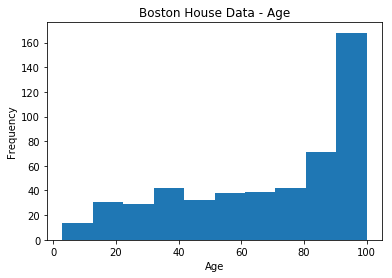

In [17]:
import matplotlib.pyplot as plt
df['AGE'].plot.hist(title='Boston House Data - Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
